## About
This notebook requires the [FIREBALL](https://github.com/Pappulab/FIREBALL) package to plot phase diagrams, which can be installed using:


    pip install git+https://github.com/Pappulab/FIREBALL.git

If you use FIREBALL, please cite the associated paper:


    Farag, M., Holehouse, A. S., Zeng, X. & Pappu, R. V. FIREBALL: A tool to fit protein phase diagrams based on mean-field theories for polymer solutions. Biophys. J. 122, 2396–2403 (2023).
  

    

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
import metapredict as meta
import protfasta
from fireball import full_binodal
from sparrow import Protein

In [2]:
long_fus = Protein('STPQGYGSTGGYGSEQSEQSSYGQQSTPQGYGSTGGYGSEQSEQSSYGQQSTPQGYGSTGGYGSEQSEQSSYGQQSTPQGYGSTGGYGSEQSEQSSYGQQFNTTTMDDVYNYLFDDESTPQGYGSTGGYGSEQSEQSSYGQQSTPQGYGSTGGYGSEQSEQSSYGQQ').molecular_weight
short_fus = Protein('STPQGYGSTGGYGSEQSEQSSYGQQFNTTTMDDVYNYLFDDESTPQGYGSTGGYGSEQSEQSSYGQQ').molecular_weight

volfract_to_mass_conc = 1310.0 # mg/ml at volume fraction of 1. 

In [3]:
print('Molecular weight of long fus: ' + str(long_fus))
print('Molecular weight of short fus: ' + str(short_fus))

Molecular weight of long fus: 17422.100000000013
Molecular weight of short fus: 7208.900000000005


In [4]:
# define some params``
W4 = 0.0 # 3 body (3B) coefficient

TOFF = 273 # Converts the y-axis units when plotting the data. Should bet set to 273.15 to convert the units from Kelvin to degrees Celsius. 
           # Should bet set to 0 to keep the units in Kelvin. Note we normalize using T_c for these figures 

INCREMENT = 7 # The increment between consecutive values of the independent variable (temp, salt, etc.)

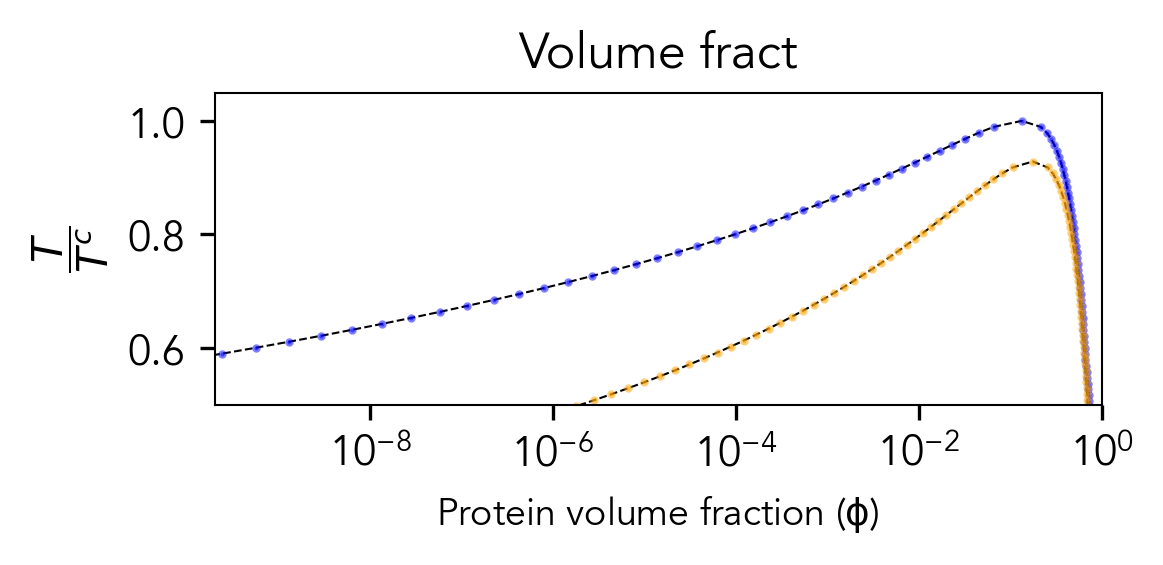

In [5]:
figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()
chi=500
n=167

# Build full phase diagram for a 167-residue IDR with a chi of 500 (attractive). Explanation for the variable input parameters is
# provided below
A = full_binodal.binodal_maker([chi, W4, n], 
                               'flory_huggins_3B', 
                               'low', 
                               None, 
                               None, 
                               temperature_offset=TOFF, 
                               increment=INCREMENT, 
                               outname=None, 
                               plotter=False)

# [chi, W4, n] : chi (2-body interaction coefficient)
#                W4  (3-body interaction coefficient; set to zero here so the theory just matches standard FH theory)
#                n   (number of monomers in polymer)
# 'flory_huggins_3B' - level of theory to use
# 'low'              - using UCST-based model
# None               - Defined values for dilute arm (if provided, if None this is determined automatically)
# None               - Defined values for dense arm (if provided, if None this is determined automatically)
# temperature_offset - Offset added where if not provided, T is in K
# increment          - The increment between consecutive values of temperature
# outname            - If provided would save output
# plotter            - If set to True prints binodal curve to screen and saves as a PDF.

## Output
# A[0] - Pandas dataframe with binodal and spinodal data
# A[1] - list of valules for the binodal in volume fraction
# A[2] - list of valules for the binodal in temperature, such that plotting 

# get the critical temperature
t_crit = np.max(A[2])

# plot t_crit normalized biondal
plt.plot(A[1], np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(A[1], np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='blue')

# repeat for the shorter FUS construct
n=67
A = full_binodal.binodal_maker([chi, W4, n], 'flory_huggins_3B', 'low', None, None, temperature_offset=TOFF, increment=INCREMENT, outname=None, plotter=False)
plt.plot(A[1], np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(A[1], np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='orange')


plt.title('Volume fract')
plt.ylim([0.5,1.05])
plt.xlim([2e-10,1])
ax.set_xscale('log')
plt.xlabel(r'Protein volume fraction ($\rm{\phi}$)',fontsize=9)
plt.ylabel(r'$\dfrac{T}{T^c}$',rotation=90)
plt.tight_layout()
plt.savefig('figures/new_full_phase_diagram_volfract.pdf')

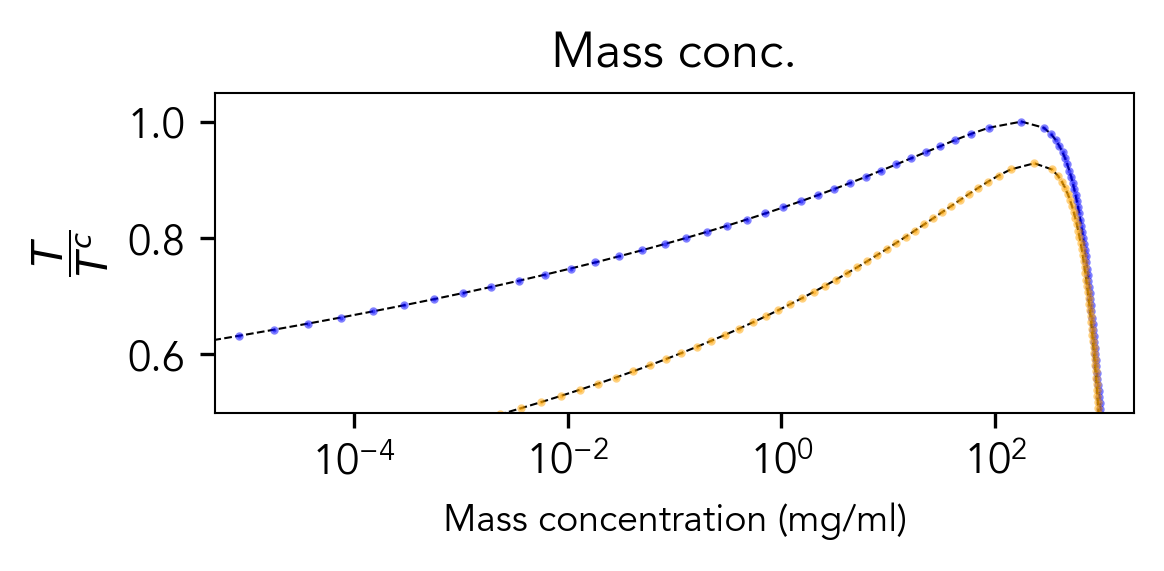

In [6]:
figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()
chi=500
n=167

#A = full_binodal.build_theoretical_binodal_flory_huggins_3B(chi,  W4, n, temperature_offset=TOFF,increment=INCREMENT)
A = full_binodal.binodal_maker([chi, W4, n], 'flory_huggins_3B', 'low', None, None, temperature_offset=TOFF, increment=INCREMENT, outname=None, plotter=False)
t_crit = np.max(A[2])

plt.plot(np.array(A[1])*volfract_to_mass_conc, np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(np.array(A[1])*volfract_to_mass_conc, np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='blue')

n=67
#A = full_binodal.build_theoretical_binodal_flory_huggins_3B(chi,  W4, n, temperature_offset=TOFF,increment=INCREMENT)
A = full_binodal.binodal_maker([chi, W4, n], 'flory_huggins_3B', 'low', None, None, temperature_offset=TOFF, increment=INCREMENT, outname=None, plotter=False)
plt.plot(np.array(A[1])*volfract_to_mass_conc, np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(np.array(A[1])*volfract_to_mass_conc, np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='orange')

#plt.xlim([0.000001,0.04])
plt.title('Mass conc.')
plt.ylim([0.5,1.05])
plt.xlim([5e-6,2000])
ax.set_xscale('log')
plt.xlabel(r'Mass concentration (mg/ml)',fontsize=9)
plt.ylabel(r'$\dfrac{T}{T^c}$',rotation=90)
plt.tight_layout()
plt.savefig('figures/new_full_phase_diagram_mass_conc.pdf')

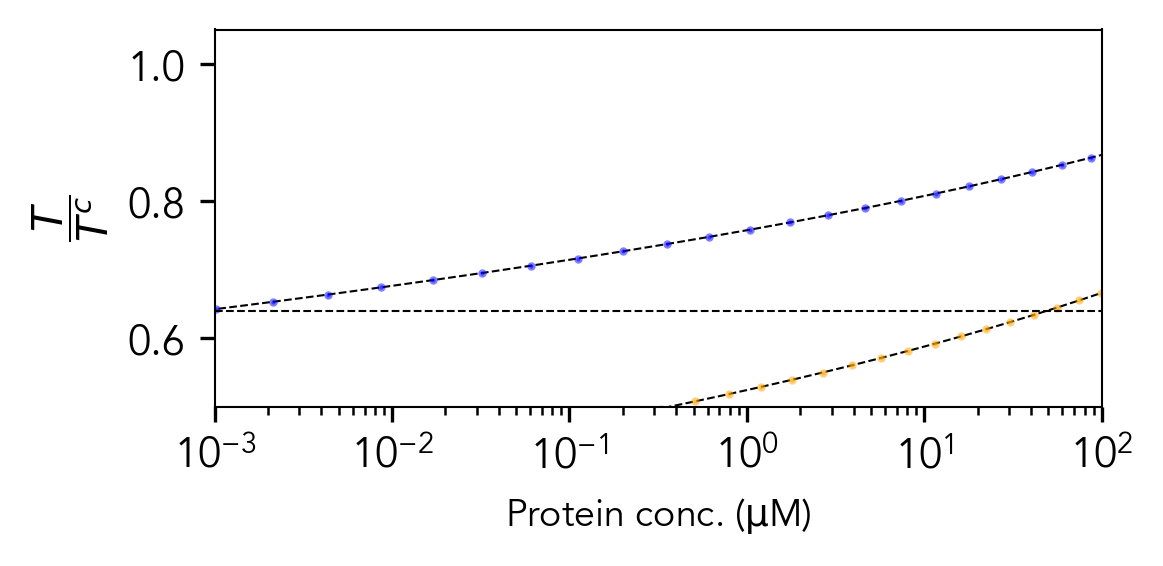

In [9]:
ZOOMED_IN = True

figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()

n=167
chi=500


#A = full_binodal.build_theoretical_binodal_flory_huggins_3B(chi,  W4, n, temperature_offset=TOFF,increment=INCREMENT)
A = full_binodal.binodal_maker([chi, W4, n], 'flory_huggins_3B', 'low', None, None, temperature_offset=TOFF, increment=INCREMENT, outname=None, plotter=False)
t_crit = np.max(A[2])

# 100000*converts from molar to micromolar
conc = ((np.array(A[1]) * volfract_to_mass_conc)/long_fus)*1000000
np.savetxt('data_out/long_fus.csv',np.array([conc, np.array(A[2])/t_crit]).transpose())

plt.plot(conc, np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(conc, np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='blue')

n=67
#A = full_binodal.build_theoretical_binodal_flory_huggins_3B(chi,  W4, n, temperature_offset=TOFF,increment=INCREMENT)
A = full_binodal.binodal_maker([chi, W4, n], 'flory_huggins_3B', 'low', None, None, temperature_offset=TOFF, increment=INCREMENT, outname=None, plotter=False)

conc = ((np.array(A[1]) * volfract_to_mass_conc)/short_fus)*1000000
np.savetxt('data_out/short_fus.csv',np.array([conc, np.array(A[2])/t_crit]).transpose())

plt.plot(conc, np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(conc, np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='orange')


ax.set_xscale('log')
plt.ylabel(r'$\dfrac{T}{T^c}$',rotation=90)
plt.xlabel(r'Protein conc. ($\rm{\mu}$M)',fontsize=9)
plt.ylim([0.5,1.05])

if ZOOMED_IN:
    plt.xlim([0.001,100])
    plt.plot([0.001,100],[0.64,0.64],'--k',linewidth=0.5)
    plt.tight_layout()
    plt.savefig('figures/new_zoom_phase_diagram_molar.pdf')
    

else:    
    plt.xlim([8e-6,200000])
    plt.tight_layout()
    plt.savefig('figures/new_full_phase_diagram_molar.pdf')



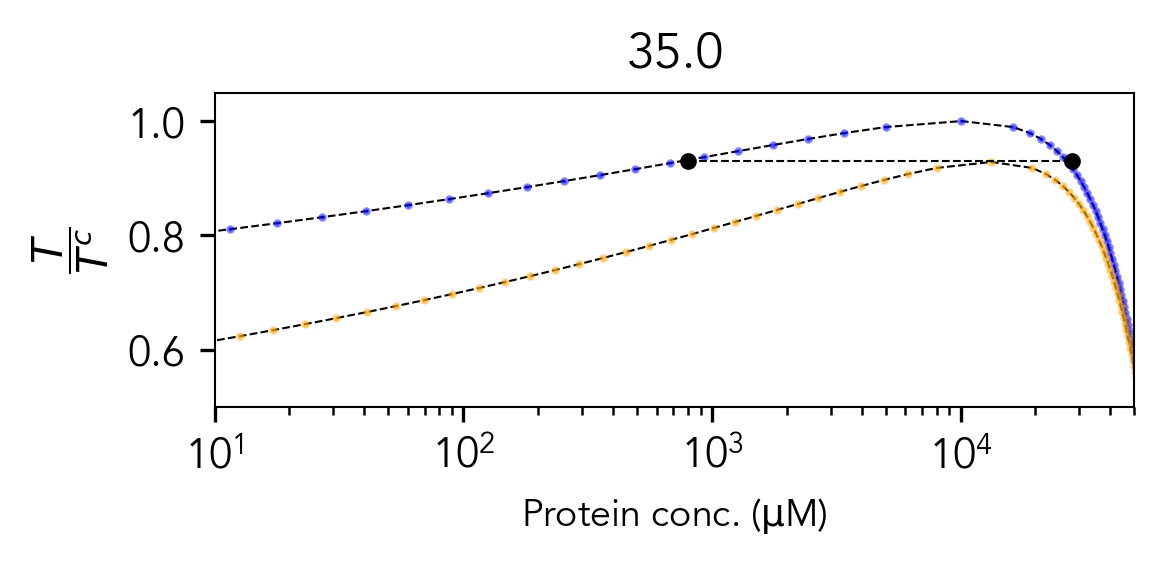

In [8]:
figure(num=None, figsize=(4, 2), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()
chi=500
n=167

#A = full_binodal.build_theoretical_binodal_flory_huggins_3B(chi,  W4, n, temperature_offset=TOFF,increment=INCREMENT)
A = full_binodal.binodal_maker([chi, W4, n], 'flory_huggins_3B', 'low', None, None, temperature_offset=TOFF, increment=INCREMENT, outname=None, plotter=False)
t_crit = np.max(A[2])

conc = ((np.array(A[1]) * volfract_to_mass_conc)/long_fus)*1000000

plt.plot(conc, np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(conc, np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='blue')

n=67
#A = full_binodal.build_theoretical_binodal_flory_huggins_3B(chi,  W4, n, temperature_offset=TOFF,increment=INCREMENT)
A = full_binodal.binodal_maker([chi, W4, n], 'flory_huggins_3B', 'low', None, None, temperature_offset=TOFF, increment=INCREMENT, outname=None, plotter=False)

# 1000000 multiplication places x in micro moles
conc = ((np.array(A[1]) * volfract_to_mass_conc)/long_fus)*1000000

plt.plot(conc, np.array(A[2])/t_crit,'k--',linewidth=0.5)
plt.plot(conc, np.array(A[2])/t_crit,'.', alpha=0.5, markersize=2, color='orange')

plt.xlim([10,50000])
plt.ylim([0.5,1.05])
ax.set_xscale('log')
plt.ylabel(r'$\dfrac{T}{T^c}$',rotation=90)
plt.xlabel(r'Protein conc. ($\rm{\mu}$M)',fontsize=9)
plt.plot([800,28000],[0.93,0.93],'--ko',linewidth=0.5,ms=3)
plt.title(28000/800)
plt.tight_layout()
plt.savefig('figures/new_top_phase_diagram_molar.pdf')

